# Лабораторная работа №2

Методы предсказания погоды

In [63]:
import pandas as pd
import pandas as pd
import numpy as np
from pprint import pprint
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [64]:
# importing data
data = pd.read_csv('./data/seattle-weather.csv')

y = data['weather']
X = data.drop(['date', 'weather'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=400, shuffle=False)

pprint(data)
print(data.isnull().sum())

            date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle
1     2012-01-02           10.9      10.6       2.8   4.5     rain
2     2012-01-03            0.8      11.7       7.2   2.3     rain
3     2012-01-04           20.3      12.2       5.6   4.7     rain
4     2012-01-05            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9     rain
1457  2015-12-28            1.5       5.0       1.7   1.3     rain
1458  2015-12-29            0.0       7.2       0.6   2.6      fog
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]
date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


# Dummy classifier. Example on seattle-weather.

In [38]:
from sklearn.dummy import DummyClassifier


dummy = DummyClassifier()
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)

print(pd.Series(y_pred).value_counts())  # mostly common variant
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
pd.concat([pd.Series(y_pred), y_test.reset_index()['weather']], axis=1)

rain    400
Name: count, dtype: int64
Accuracy: 0.4025


,0,weather
0,rain,rain
1,rain,rain
2,rain,snow
3,rain,sun
4,rain,sun
...,...,...
395,rain,rain
396,rain,rain
397,rain,fog
398,rain,sun


# K-neighbours classifier. Example on seattle-weather.

In [70]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=25)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(pd.Series(y_pred).value_counts())  # mostly common variant
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
pd.concat([pd.Series(y_pred), y_test.reset_index()['weather']], axis=1)

sun     230
rain    170
Name: count, dtype: int64
Accuracy: 0.7375


,0,weather
0,rain,rain
1,rain,rain
2,sun,snow
3,sun,sun
4,sun,sun
...,...,...
395,rain,rain
396,rain,rain
397,sun,fog
398,sun,sun


# GaussianNB. Example on seattle-weather.

In [39]:
from sklearn.naive_bayes import GaussianNB

gauss = GaussianNB()
gauss.fit(X_train, y_train)
y_pred = gauss.predict(X_test)

print(pd.Series(y_pred).value_counts())  # mostly common variant
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
pd.concat([pd.Series(y_pred), y_test.reset_index()['weather']], axis=1)


sun        233
rain       157
snow         5
drizzle      5
Name: count, dtype: int64
Accuracy: 0.8175


,0,weather
0,rain,rain
1,rain,rain
2,snow,snow
3,sun,sun
4,drizzle,sun
...,...,...
395,snow,rain
396,rain,rain
397,sun,fog
398,sun,sun


# Stochastic gradient descent (SGD). Example on seattle-weather.

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   18.9s remaining:   57.0s
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:   18.9s remaining:   31.6s
[Parallel(n_jobs=-1)]: Done   4 out of   8 | elapsed:   18.9s remaining:   18.9s
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:   18.9s remaining:   11.3s
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:   19.0s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   19.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   19.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.2s


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished


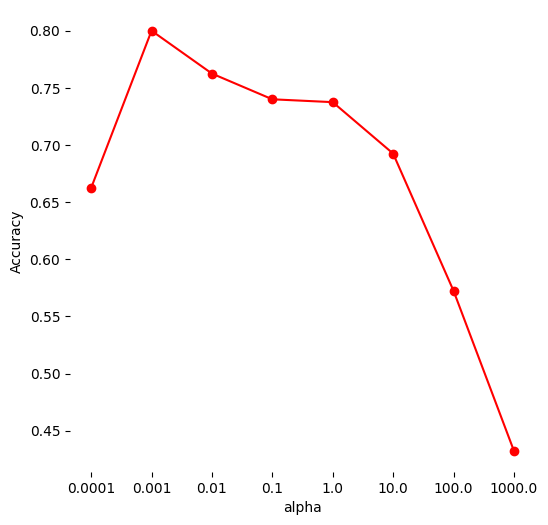

Best model & score from bestFit: SGDClassifier(alpha=0.001, loss='log', n_jobs=-1),

 0.8


,0,weather
0,rain,rain
1,rain,rain
2,rain,snow
3,sun,sun
4,sun,sun
...,...,...
395,rain,rain
396,rain,rain
397,rain,fog
398,sun,sun


In [72]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import ParameterGrid
import parfit.parfit as pf


sgd = SGDClassifier(n_jobs=-1)  # Run using all processors
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

#  Finding the optimal learning rate:
grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],  # learning rate // TODO: Change step's amount to make the purest result
    'loss': ['log'],  # logistic regression
    'penalty': ['l2'],  # L2 Regularization. Add a penalty to reduces the overfitting
    'n_jobs': [-1]  # Run using all processors
}

paramGrid = ParameterGrid(grid)

bestModel, bestScore, allModels, allScores = pf.bestFit(
    SGDClassifier, paramGrid, X_train, y_train, X_test, y_test, 
    metric = accuracy_score, scoreLabel = "Accuracy")

print(f"Best model & score from bestFit: {bestModel},\n\n {bestScore}")
pd.concat([pd.Series(y_pred), y_test.reset_index()['weather']], axis=1)


# 